# First investigation of the datasets available

## File type: .tiff

### Investigation of given X_train data

In [1]:
import numpy as np
from PIL import Image

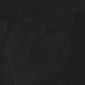

In [2]:
im_red = Image.open('/Users/marcuslotte/code/acgontijo/pixel_prediction/multiearth-challenge/src/multiearth_challenge/data/sample_dataset/landsat8/Landsat8_SR_B4_-54.74_-4.09_2020_06_08.tiff')
im_red # RGB -> Red channel

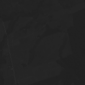

In [3]:
im_green = Image.open('/Users/marcuslotte/code/acgontijo/pixel_prediction/multiearth-challenge/src/multiearth_challenge/data/sample_dataset/landsat8/Landsat8_SR_B3_-54.74_-4.09_2020_06_08.tiff')
im_green #RGB -> Green channel

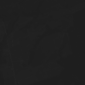

In [4]:
im_blue = Image.open('/Users/marcuslotte/code/acgontijo/pixel_prediction/multiearth-challenge/src/multiearth_challenge/data/sample_dataset/landsat8/Landsat8_SR_B2_-54.74_-4.09_2020_06_08.tiff')
im_blue # RGB -> Blue channel

In [5]:
imarray = np.array(im_red)
imarray

array([[8119, 8207, 8380, ..., 8570, 8426, 7798],
       [8216, 8196, 8345, ..., 8272, 8266, 7877],
       [8126, 8126, 8264, ..., 8498, 8798, 8563],
       ...,
       [7800, 7831, 7827, ..., 7871, 7769, 7828],
       [7991, 7857, 7858, ..., 7968, 7935, 7891],
       [7956, 8035, 8140, ..., 7912, 8019, 8149]], dtype=uint16)

In [6]:
imarray.shape

(85, 85)

In [7]:
im_RGB = np.stack((im_red, im_green, im_blue), axis=-1) # stacking the RGB channels to create colorful picture

In [8]:
im_RGB.shape

(85, 85, 3)

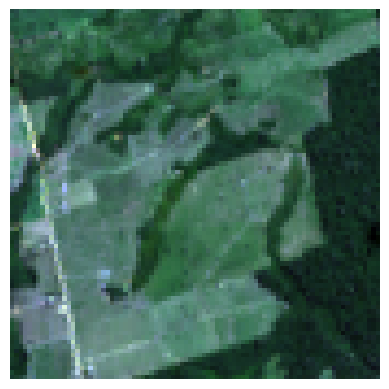

In [9]:
import matplotlib.pyplot as plt

# Normalize the channels to [0, 1] for displaying because values are not set to color code standards (255)
def normalize_channel(channel):
    return (((channel - np.min(channel)) / (np.max(channel) - np.min(channel))) * 255).astype(int)

im_red_normalized = normalize_channel(im_red)
im_green_normalized = normalize_channel(im_green)
im_blue_normalized = normalize_channel(im_blue)

# Combine the channels into an RGB image
color_image = np.stack((im_red_normalized, im_green_normalized, im_blue_normalized), axis=-1)

# Display the image
plt.imshow(color_image)
plt.axis('off')
plt.show()

### Investigation of the given y_train data

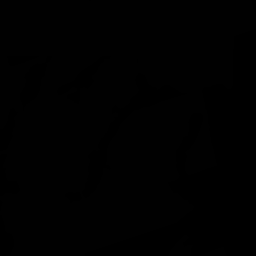

In [10]:
y_im = Image.open('/Users/marcuslotte/code/acgontijo/pixel_prediction/raw_data/train/Deforestation_-54.74_-4.09_2020_08_01.tiff')
y_im

In [11]:
y_imarray = np.array(y_im)
y_imarray

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

NOTE: it is already normalized [0, 1]

In [12]:
y_imarray.shape

(256, 256)

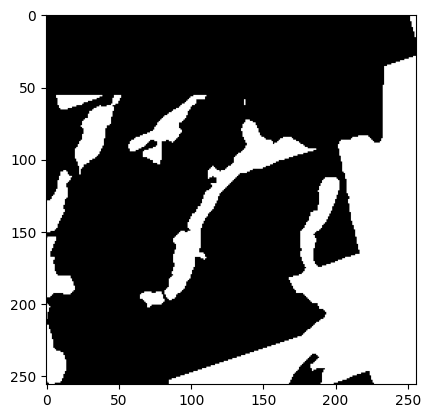

In [13]:
plt.imshow(y_imarray, cmap="Greys");

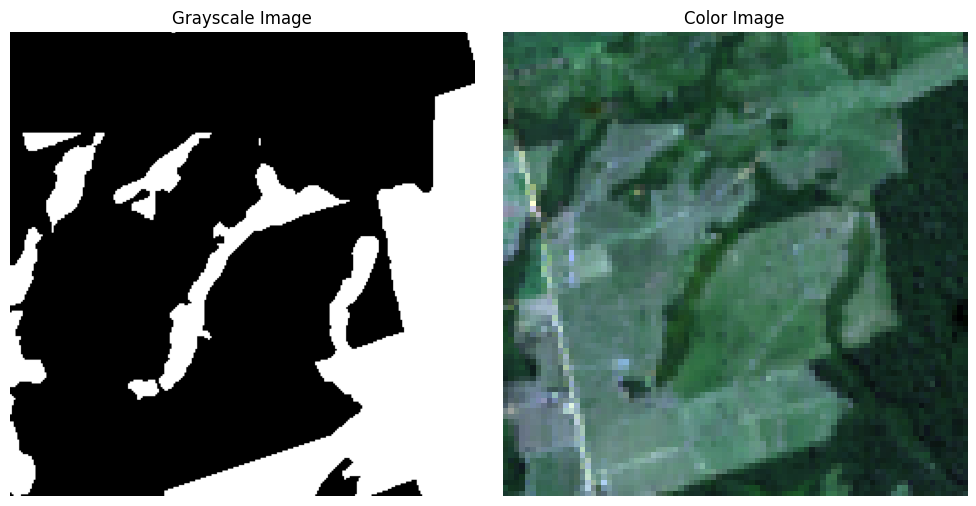

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the first image (grayscale)
axes[0].imshow(y_imarray, cmap="Greys")
axes[0].axis('off')  # Remove axis
axes[0].set_title("Grayscale Image")

# Display the second image (color)
axes[1].imshow(color_image)
axes[1].axis('off')
axes[1].set_title("Color Image")

plt.tight_layout()
plt.show()

In [15]:
y_im_change = Image.open('/Users/marcuslotte/code/acgontijo/pixel_prediction/raw_data/train/Deforestation_-54.74_-4.09_2017_08_01.tiff')

In [16]:
y_imarray_change = np.array(y_im_change)
y_imarray_change

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

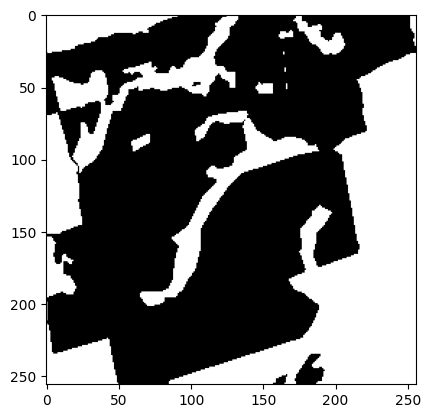

In [17]:
plt.imshow(y_imarray_change, cmap="Greys");

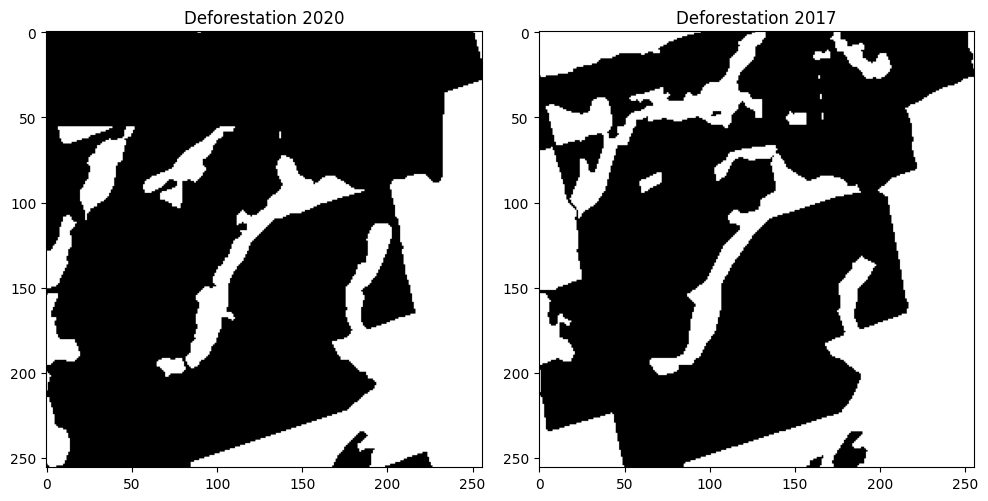

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the first image (grayscale)
axes[0].imshow(y_imarray, cmap="Greys")
axes[0].set_title("Deforestation 2020")

# Display the second image (color)
axes[1].imshow(y_imarray_change, cmap="Greys")

axes[1].set_title("Deforestation 2017")
plt.tight_layout()
plt.show()

In [19]:
difference = np.abs(y_imarray_change - y_imarray)
difference

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0]], dtype=uint8)

In [20]:
total_change = np.sum(difference)
total_change

np.uint64(1952443)

In [21]:
# Convert the difference to an image (normalizing if needed)
difference_image = Image.fromarray(difference.astype(np.uint8))

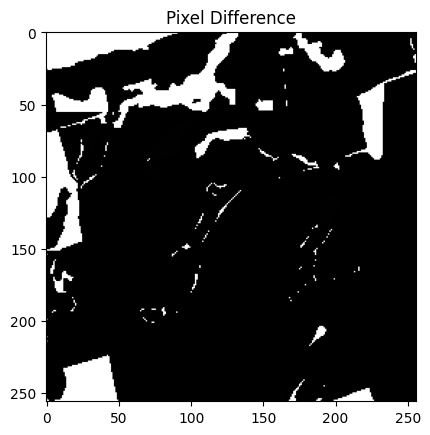

In [22]:
plt.imshow(difference, cmap='gray')
plt.title("Pixel Difference")
plt.show()

.

.

.

## File type: .nc (specific file type created for the challenge)

In [ ]:
import xarray as xr

In [ ]:
dataset_path = "/Users/marcuslotte/code/acgontijo/pixel_prediction/multiearth-challenge/src/multiearth_challenge/data/sample_dataset/landsat8_sample.nc"
data = xr.open_dataset(dataset_path)

In [ ]:
data